# Machine Learning Project   - Youtube Comments Classification

 In this project I will classify Youtube Comments if it's Spam or Ham using different machine learning models 

# Let's start with importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score




# Then Reading Our datasets

In [2]:
files = glob.glob('C:\\Users\\lap-tech\\Downloads\\youtube-dataset\\youtube-dataset\\*.csv')
files

['C:\\Users\\lap-tech\\Downloads\\youtube-dataset\\youtube-dataset\\Youtube01.csv',
 'C:\\Users\\lap-tech\\Downloads\\youtube-dataset\\youtube-dataset\\Youtube02.csv',
 'C:\\Users\\lap-tech\\Downloads\\youtube-dataset\\youtube-dataset\\Youtube03.csv',
 'C:\\Users\\lap-tech\\Downloads\\youtube-dataset\\youtube-dataset\\Youtube04.csv',
 'C:\\Users\\lap-tech\\Downloads\\youtube-dataset\\youtube-dataset\\Youtube05.csv']

# Preparing Dataset before Modeling

I will start by Dropping other unnecessary columns kepping only the comment column and label class column

In [4]:
all_df=[]
for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'],axis=1))


Then I put  all 5 dataset files  into one big dataset

In [5]:
data=pd.concat(all_df,axis=0,ignore_index=True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


let's check if there's null values

In [6]:
data.isna().sum()

CONTENT    0
CLASS      0
dtype: int64

let's see the difference between number of spam and not spam 

In [7]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

 Identifying input,output in our dataset 

In [8]:
inputs=data['CONTENT']
target=data['CLASS']

After we define input and output label ,Let's split our data into training and testing 

In [9]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,
                                               test_size=0.3,
                                               random_state=365,
                                               stratify=target)

In [10]:
y_train.value_counts(normalize=True)

1    0.513889
0    0.486111
Name: CLASS, dtype: float64

Data Visualization

Let's Visualize number of Spam and Ham Comments Using barPlot and piechart

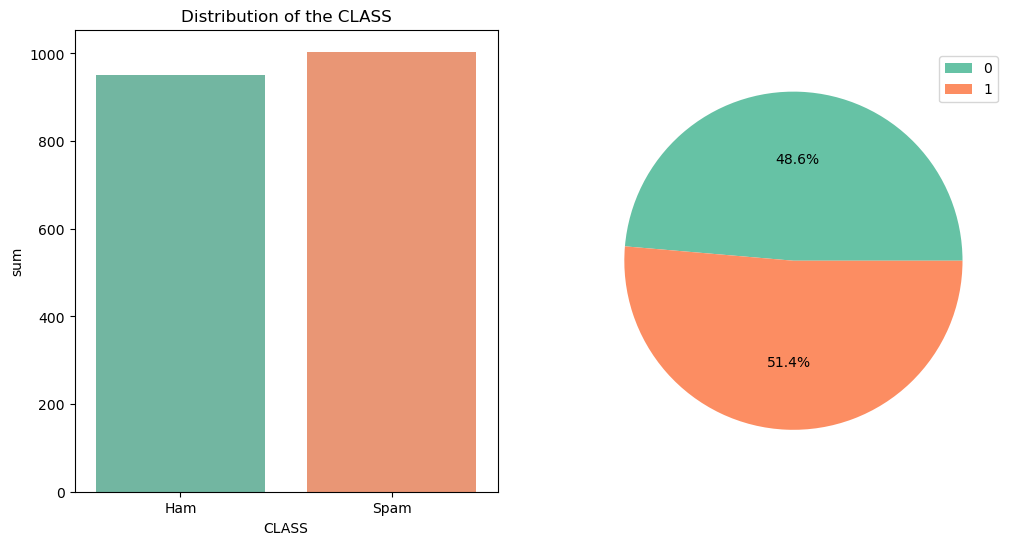

In [16]:
st = data.groupby('CLASS').size().reset_index(name = 'sum')

fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.barplot(data = st, x = 'CLASS', y = 'sum', ax = ax[0],  palette='Set2')
ax[0].set_xticklabels(['Ham', 'Spam'])
ax[1].pie(st['sum'], autopct = '%0.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.legend(labels = st['CLASS'])
ax[0].set_title('Distribution of the CLASS')
plt.show()

After We visualize our data We notice that:
1- 0 stands for Ham and 1 stands for Spam.
2-Percentage of Both Spam and Ham are very close but Spam are higher.

# Preprocessing Dataset

Let's tokenize youtube comments after spliting data into training and testing

In [17]:
vectorizer=CountVectorizer()

In [18]:
x_train_trans=vectorizer.fit_transform(x_train)
x_test_trans=vectorizer.transform(x_test)


In [19]:
x_train_trans.shape

(1368, 3633)

let's figure if comments are unique or not through sparse matrix

In [20]:
x_train_trans.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

From the previous sparse matrix,we figure out that comments are unique and repeating words are rare  

# Modeling

Let's Start Modeling With KNN

In [21]:
# the reason wht i choose n_neighbors=3  as it gives the highest possible  accuracy even higher when i let the model choose   
knn=KNN(n_neighbors=3)
knn.fit(x_train_trans,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred_knn=knn.predict(x_test_trans)
knn_accuracy=accuracy_score(y_test,y_pred_knn)
training_acc_knn=knn.score(x_train_trans,y_train)
print('Trainig Accuracy Of KNN is : {:.3f}'.format(training_acc_knn))
print('Testing Acuuracy Of KNN is : {:.3f}'.format(knn_accuracy))

Trainig Accuracy Of KNN is : 0.912
Testing Acuuracy Of KNN is : 0.882


Confusion matrix of KNN Model

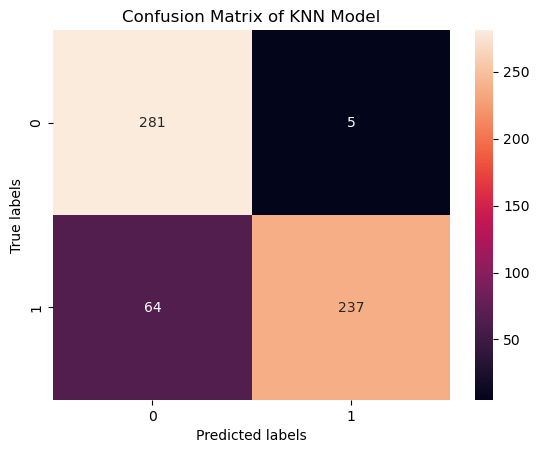

In [23]:
c = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of KNN Model')
plt.show()

Let's Figure out Evaluation Metrics of our KNN Model

In [24]:
print(classification_report(y_test,y_pred_knn,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.81      0.98      0.89       286
        spam       0.98      0.79      0.87       301

    accuracy                           0.88       587
   macro avg       0.90      0.88      0.88       587
weighted avg       0.90      0.88      0.88       587



# Performing Naive Bayes Algorithm Using Multinomial Classifier

In [25]:
nb=MultinomialNB()

In [26]:
nb.fit(x_train_trans,y_train)

MultinomialNB()

In [27]:
nb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

Let's see both trainig and testing accuracy of Navie Bayes

In [28]:
y_test_pred = nb.predict(x_test_trans)
nb_accuracy=accuracy_score(y_test,y_test_pred)
training_acc_nb=nb.score(x_train_trans,y_train)
print('Trainig Accuracy Of Navie Bayes  is : {:.3f}'.format(training_acc_nb))
print('Testing Acuuracy Of Navie Bayes is : {:.3f}'.format(nb_accuracy))

Trainig Accuracy Of Navie Bayes  is : 0.965
Testing Acuuracy Of Navie Bayes is : 0.920


let's show confusion matrix of Navie Bayes to see TN,FP,FN,TP

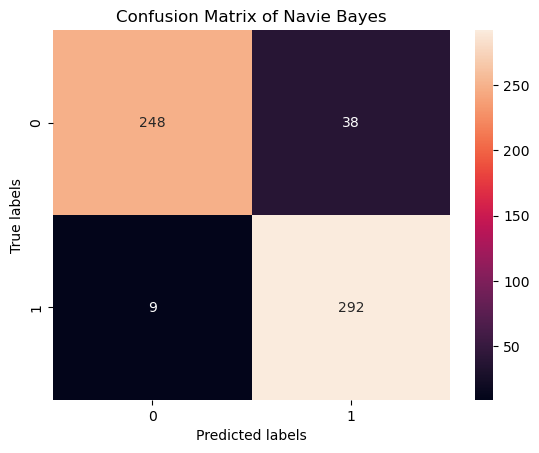

In [29]:
c = confusion_matrix(y_test, y_test_pred)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Navie Bayes')
plt.show()

We notice that :
1-confusion matrix of Navie Bayes is better than KNN because:
                 - it reduces the number of FN comparing to KNN .
                 - total number of FN+FP in Navie Bayes  less than  KNN.
2-Accuracy of Navie Bayes is higher KNN.

Now, let's figure out evaluation of our model

In [30]:
print(classification_report(y_test,y_test_pred,target_names=['ham','spam']))


              precision    recall  f1-score   support

         ham       0.96      0.87      0.91       286
        spam       0.88      0.97      0.93       301

    accuracy                           0.92       587
   macro avg       0.92      0.92      0.92       587
weighted avg       0.92      0.92      0.92       587



 Testing Naive Bayes Model with real example

In [31]:
# 0 for ham  ,    1 for spam
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])
nb.predict(predict_data)

array([0, 1], dtype=int64)

# Decision Tree Model

In [32]:
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train_trans,y_train)

DecisionTreeClassifier(random_state=1)

Let's see both trainig and testing accuracy of Decision Tree  

In [33]:
# When I didn't specify specific max_depth it gives high accuracy
y_pred_dt=dt.predict(x_test_trans)
dt_accuracy=accuracy_score(y_test,y_pred_dt)
training_acc_dt=dt.score(x_train_trans,y_train)
print('Trainig Accuracy Of Decision Tree is : {:.3f}'.format(training_acc_dt))
print('Testing Acuuracy Of Decision Tree is : {:.3f}'.format(dt_accuracy))

Trainig Accuracy Of Decision Tree is : 1.000
Testing Acuuracy Of Decision Tree is : 0.947


Confusion matrix of Decision Tree  Model

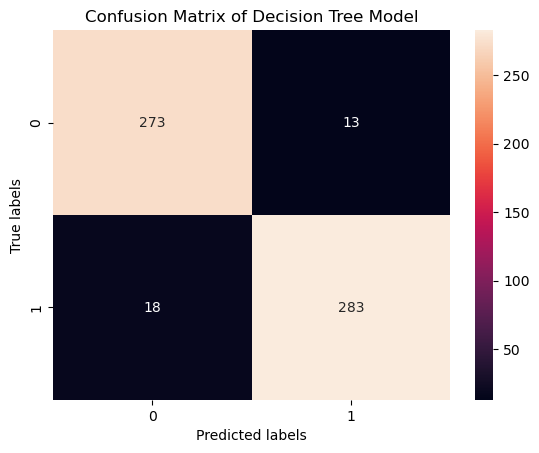

In [34]:
c = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Decision Tree Model')
plt.show()

We notice that :
1-confusion matrix of Decision Tree is better than both Navie Bayes and KNN because:
                 - total number of FN+FP in Decision Tree  is less than both in Navie Bayes and   KNN.
2-Accuracy of Decision Tree is higher than both in Navie Bayes and   KNN.

Let's Figure out Evaluation Metrics of our Decision Tree Model

In [36]:
print(classification_report(y_test,y_pred_dt,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.94      0.95      0.95       286
        spam       0.96      0.94      0.95       301

    accuracy                           0.95       587
   macro avg       0.95      0.95      0.95       587
weighted avg       0.95      0.95      0.95       587



# Logistic Regression Model

In [37]:
lr_c=LogisticRegression(random_state=1)
lr_c.fit(x_train_trans,y_train)

LogisticRegression(random_state=1)

In [38]:
y_pred_lr=lr_c.predict(x_test_trans)


Let's see both trainig and testing accuracy of Logistic Regression

In [39]:
lr_accuracy=accuracy_score(y_test,y_pred_lr)
training_acc_lr=lr_c.score(x_train_trans,y_train)
print('Trainig Accuracy Of Logistic Regression is : {:.3f}'.format(training_acc_lr))
print('Testing Acuuracy Of Logistic Regression is : {:.3f}'.format(lr_accuracy))

Trainig Accuracy Of Logistic Regression is : 0.994
Testing Acuuracy Of Logistic Regression is : 0.949


Let's See Our Confusion Matrix of Logistic Regression Model

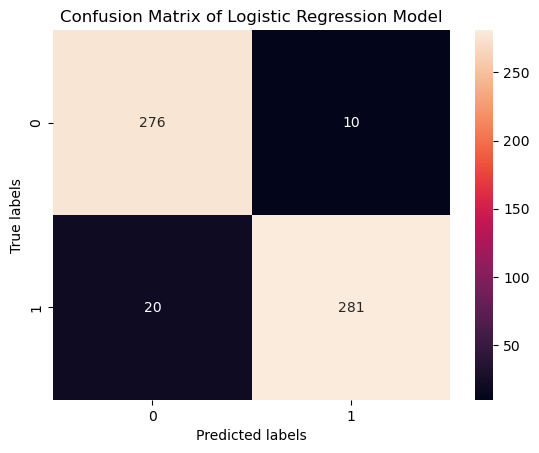

In [40]:
c = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

We notice that :
1-confusion matrix of Logistic Regression  is almost the same as Decision Tree  because:
                 - total number of FN+FP in Logistic Regression  almost equal  Decision Tree.
2-Accuracy of Logistic Regression is almost equal  Decision Tree.

Let's Figure out Evaluation Metrics of our Logistic Regression Model

In [41]:
print(classification_report(y_test,y_pred_lr,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.93      0.97      0.95       286
        spam       0.97      0.93      0.95       301

    accuracy                           0.95       587
   macro avg       0.95      0.95      0.95       587
weighted avg       0.95      0.95      0.95       587



# Support Vector Machine Model 

In [42]:
svc=SVC()
svc.fit(x_train_trans,y_train)

SVC()

Let's see both trainig and testing accuracy of SVC

In [43]:
y_pred_svc=svc.predict(x_test_trans)
svc_accuracy=accuracy_score(y_test,y_pred_svc)
training_acc_svc=svc.score(x_train_trans,y_train)

print('Trainig Accuracy Of SVC is : {:.3f}'.format(training_acc_svc))
print('Testing Acuuracy Of SVC is : {:.3f}'.format(svc_accuracy))

Trainig Accuracy Of SVC is : 0.971
Testing Acuuracy Of SVC is : 0.942


Confusion Matrix of SVC Model 

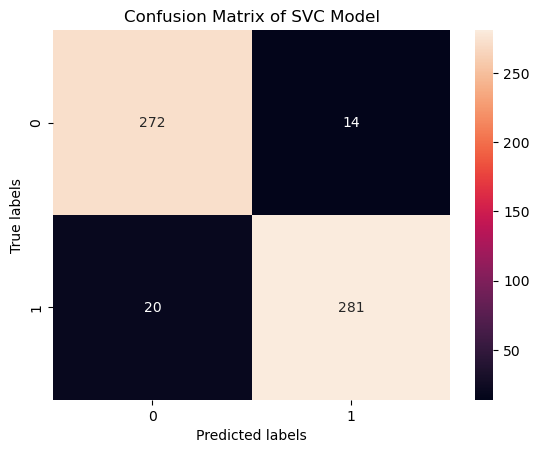

In [44]:
c = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVC Model')
plt.show()

We notice that :
1-confusion matrix of SVC isn't better than in both Decision Tree  and Logistic Regression  because:
                - total number of FN+FP in SVC is getting bigger comparing to both of them.
2-Accuracy of SVC is almost the same as both of Decision Tree  and Logistic Regression .

Let's Figure out Evaluation Metrics of our SVC Model

In [45]:
print(classification_report(y_test,y_pred_svc,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.93      0.95      0.94       286
        spam       0.95      0.93      0.94       301

    accuracy                           0.94       587
   macro avg       0.94      0.94      0.94       587
weighted avg       0.94      0.94      0.94       587



#  Voting Classifier As an  Ensemble Learning  Technique

First we set our base models
I will use Logistic Regression,KNN,Decision Tree as base models for voting classifier

In [46]:
lr=LogisticRegression(random_state=1)
dt=DecisionTreeClassifier(random_state=1)
knn=KNN()

Let's define alist of tuples,each tuple contain a (classier_name,classifier)  

In [47]:
Classifiers=[('Logistic_Regression',lr),('DecisionTree',dt),('K_Nearest_Neighbor',knn)]
Classifiers

[('Logistic_Regression', LogisticRegression(random_state=1)),
 ('DecisionTree', DecisionTreeClassifier(random_state=1)),
 ('K_Nearest_Neighbor', KNeighborsClassifier())]

Fit,predict and show the accuracy of each classifier

In [48]:
for cla_name,cla in Classifiers:
    cla.fit(x_train_trans,y_train)
    y_pred=cla.predict(x_test_trans)
    print(cla_name," : ",accuracy_score(y_test,y_pred))

Logistic_Regression  :  0.948892674616695
DecisionTree  :  0.9471890971039182
K_Nearest_Neighbor  :  0.8739352640545145


Now we train and pass these 3 base models  to voting classifier 

In [49]:
vc=VotingClassifier(estimators=Classifiers)
vc.fit(x_train_trans,y_train)

VotingClassifier(estimators=[('Logistic_Regression',
                              LogisticRegression(random_state=1)),
                             ('DecisionTree',
                              DecisionTreeClassifier(random_state=1)),
                             ('K_Nearest_Neighbor', KNeighborsClassifier())])

Let's see both trainig and testing accuracy of Voting Classifier

In [50]:
vc_pred=vc.predict(x_test_trans)
vc_accuracy=accuracy_score(y_test,vc_pred)
training_acc_vc=vc.score(x_train_trans,y_train)

print('Trainig Accuracy Of Voting Classifier is : {:.3f}'.format(training_acc_vc))
print('Testing Acuuracy Of Voting Classifier is : {:.3f}'.format(vc_accuracy))

Trainig Accuracy Of Voting Classifier is : 0.995
Testing Acuuracy Of Voting Classifier is : 0.951


So we notice that accuracy of voting classifier is higher than any base model in its classifiers and this why we combine more than one model inwhich calls voting classifier 

Now,Let's See Confusion Matrix of Voting Classifier Model

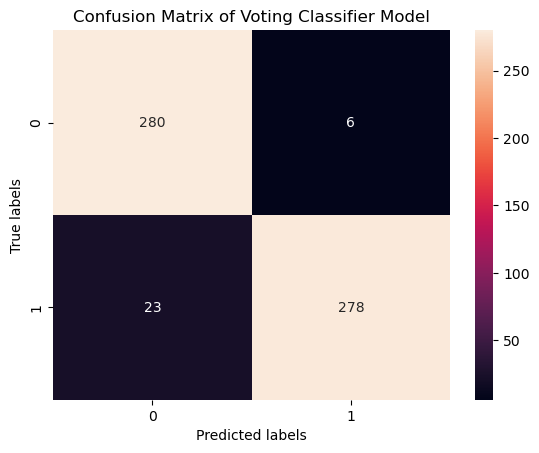

In [51]:
c = confusion_matrix(y_test, vc_pred)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Voting Classifier Model')
plt.show()

We notice that :
1-confusion matrix of Voting Classifier  is better than any previous model because:
                 - total number of FN+FP in Navie Bayes  less than  any model above.
2-Accuracy of Voting Classifier is higher any previous model.

Finally,Let's Figure out Evaluation Metrics of our Voting Classifier Model

In [52]:
print(classification_report(y_test,vc_pred,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       286
        spam       0.98      0.92      0.95       301

    accuracy                           0.95       587
   macro avg       0.95      0.95      0.95       587
weighted avg       0.95      0.95      0.95       587



# Random Forest Model

In [53]:
# I choose number_of_estimators=500 as it gives the highest accuracy if it's higher or less than 500 it won't give such high accuracy 
rf=RandomForestClassifier(n_estimators=500,random_state=1)
rf.fit(x_train_trans,y_train)


RandomForestClassifier(n_estimators=500, random_state=1)

After we fit the model,Let's predict and see the difference between training and testing  accuracy 

In [54]:
y_pred_rf=rf.predict(x_test_trans)
rf_accuracy=accuracy_score(y_test,y_pred_rf)
training_acc_rf=rf.score(x_train_trans,y_train)
print('Trainig Accuracy Of Random Forest is : {:.3f}'.format(training_acc_rf))
print('Testing Acuuracy Of Random Forest is : {:.3f}'.format(rf_accuracy))

Trainig Accuracy Of Random Forest is : 1.000
Testing Acuuracy Of Random Forest is : 0.966


confusion matrix of Random Forest Model

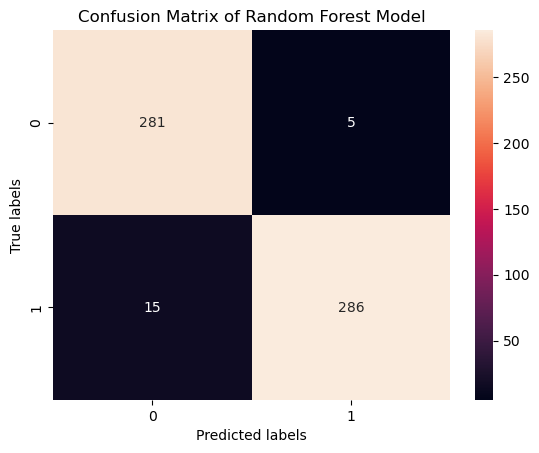

In [55]:
c = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

We notice that :
1-confusion matrix of Random Forest is better than any previous model even if Voting Classifier  because:
                 - total number of FN+FP in Random Forest  less than  any model above.
2-Accuracy of Random Forest is higher any previous model as no model gets 0.966 accuracy.

Let's Figure out Evaluation Metrics of our Random Forest Model

In [56]:
print(classification_report(y_test,y_pred_rf,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.97       286
        spam       0.98      0.95      0.97       301

    accuracy                           0.97       587
   macro avg       0.97      0.97      0.97       587
weighted avg       0.97      0.97      0.97       587



# Bagging Classifier

In Bagging Classifier, Each estimator will work in parallel and combines them for 
determining the model average accuracy. 

In [57]:
bg=BaggingClassifier(estimator=dt,n_estimators=500,random_state=1)
bg.fit(x_train_trans,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=500, random_state=1)

After we fit the bagging clasifier model ,Let's see both trainig and testing accuracy  

In [58]:
y_pred_bg=bg.predict(x_test_trans)
bg_accuracy=accuracy_score(y_test,y_pred_bg)
training_acc_bg=bg.score(x_train_trans,y_train)
print('Trainig Accuracy Of Bagging Classifier is : {:.3f}'.format(training_acc_bg))
print('Testing Acuuracy Of Bagging Classifier  is : {:.3f}'.format(bg_accuracy))

Trainig Accuracy Of Bagging Classifier is : 1.000
Testing Acuuracy Of Bagging Classifier  is : 0.959


Confusion Matrix of Bagging Classifier Model

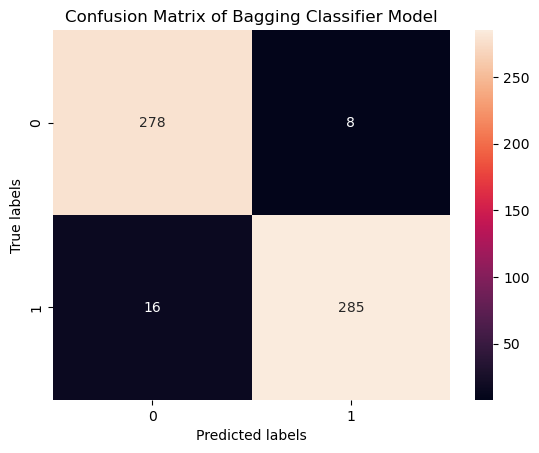

In [59]:
c = confusion_matrix(y_test, y_pred_bg)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Bagging Classifier Model')
plt.show()

Let's Figure out Evaluation Metrics of our Bagging Classifier Model

In [60]:
print(classification_report(y_test,y_pred_bg,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       286
        spam       0.97      0.95      0.96       301

    accuracy                           0.96       587
   macro avg       0.96      0.96      0.96       587
weighted avg       0.96      0.96      0.96       587



# AdaBoost Classifier

In [61]:
ad_clf=AdaBoostClassifier(estimator=dt,n_estimators=100)
ad_clf.fit(x_train_trans,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1),
                   n_estimators=100)

Let's see both trainig and testing accuracy of AdaBoost Classifier 

In [62]:
y_pred_ad_clf=ad_clf.predict(x_test_trans)
ad_clf_accuracy=accuracy_score(y_test,y_pred_ad_clf)
training_acc_ad_clf=ad_clf.score(x_train_trans,y_train)
print('Trainig Accuracy Of AdaBoost Classifier : {:.3f}'.format(training_acc_ad_clf))
print('Testing Acuuracy Of AdaBoost Classifier : {:.3f}'.format(ad_clf_accuracy))

Trainig Accuracy Of AdaBoost Classifier : 1.000
Testing Acuuracy Of AdaBoost Classifier : 0.942


Confusion Matrix of Bagging Classifier Model

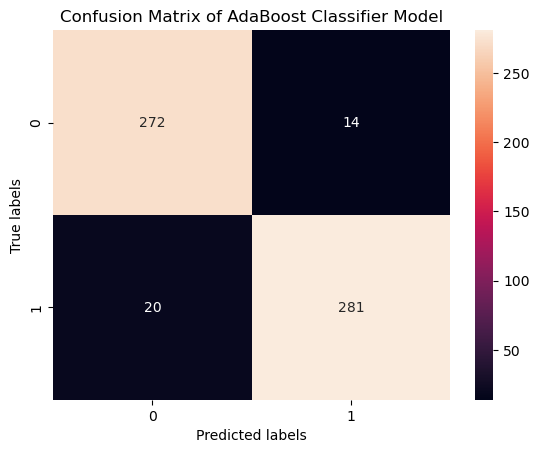

In [63]:
c = confusion_matrix(y_test, y_pred_ad_clf)
sns.heatmap(c, annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of AdaBoost Classifier Model')
plt.show()

We notice that :
 Accuracy of AdaBoost Classifier  is the lowest accuracy comparing to other ensemble learning models  because:
                 - total number of FN+FP in AdaBoost  higher than  Random Forest,Boosting Classifier and Voting Classifier.

Let's Figure out Evaluation Metrics of our Bagging Classifier Model

In [64]:
print(classification_report(y_test,y_pred_ad_clf,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       0.93      0.95      0.94       286
        spam       0.95      0.93      0.94       301

    accuracy                           0.94       587
   macro avg       0.94      0.94      0.94       587
weighted avg       0.94      0.94      0.94       587



Let's See Metrics for all supervised learning Models  I have used to evaluate their performance

In [65]:
classifiers = [ KNN(),
            MultinomialNB(), 
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            SVC(),
            LogisticRegression(),
            VotingClassifier(estimators=Classifiers),
            BaggingClassifier(),
            AdaBoostClassifier()
            ]
precision = []
recall = []
f1 = []  # Rename the list variable to avoid conflict with function name
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    i.fit(x_train_trans, y_train)  # Fit the classifier with training data
    
    pred_train = i.predict(x_train_trans)
    pred_test = i.predict(x_test_trans)
    
    prec = precision_score(y_test, pred_test)
    recal = recall_score(y_test, pred_test)
    f1_s = f1_score(y_test, pred_test)
    train_accuracy = accuracy_score(y_train, pred_train)
    test_accuracy = accuracy_score(y_test, pred_test)
  
    # Appending scores
    precision.append(prec)
    recall.append(recal)
    f1.append(f1_s)  # Append to the renamed list variable
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [66]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["KNN","Multinomial", "RandomForest","DecisionTree","SVC","LogisticRegression","VotingClassifier","BaggingClassifier"
                                     ,"AdaBoostClassifier"])

Let's Bring together and see all metrics of all  supervised Learning models I have used   

In [67]:
Results

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
KNN,0.987124,0.764120,0.861423,0.873935,0.886696
Multinomial,0.884848,0.970100,0.925515,0.919932,0.964912
RandomForest,0.986159,0.946844,0.966102,0.965928,1.000000
DecisionTree,0.956081,0.940199,0.948074,0.947189,1.000000
SVC,0.952542,0.933555,0.942953,0.942078,0.970760
LogisticRegression,0.965636,0.933555,0.949324,0.948893,0.994152
VotingClassifier,0.978873,0.923588,0.950427,0.950596,0.994883
BaggingClassifier,0.975945,0.943522,0.959459,0.959114,0.991228
AdaBoostClassifier,0.953333,0.950166,0.951747,0.950596,0.970029


Conclusion

RadomForest : Is The Model with the highest Accuracy on testing data among all other existing models i have used  and gives the most accurate decision.